In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

In [2]:
def load_dataset():
    train_dataset = h5py.File('/Users/jungyeonkoh/Desktop/catvnocat/train_catvnoncat.h5', "r")
    train_x_orig = np.array(train_dataset["train_set_x"][:]) # feature
    train_y_orig = np.array(train_dataset["train_set_y"][:]) # label
    train_y_orig = train_y_orig.reshape((1, train_y_orig.shape[0]))
    
    test_dataset = h5py.File('/Users/jungyeonkoh/Desktop/catvnocat/test_catvnoncat.h5', "r")
    test_x_orig = np.array(test_dataset["test_set_x"][:]) # feature
    test_y_orig = np.array(test_dataset["test_set_y"][:]) # label
    test_y_orig = test_y_orig.reshape((1, test_y_orig.shape[0]))
    
    classes = np.array(test_dataset["list_classes"][:])
    
    return train_x_orig, train_y_orig, test_x_orig, test_y_orig, classes

# load dataset
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

y= [1], it is a cat'picture.


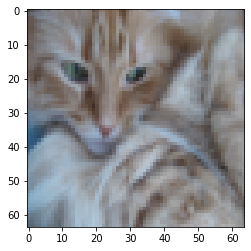

In [14]:
# example
index = 2
plt.imshow(train_x_orig[index])
print("y= "+str(train_y[:, index]) + ", it is a " + 
      classes[np.squeeze(train_y[:,index])].decode("utf-8") + "'picture.")

In [18]:
# dataset info
m_train = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]
num_px = train_x_orig.shape[1]

print("Number of training examples: "+str(m_train))
print("Number of testing examples: "+str(m_test))
print("Height/Width of each image: "+str(num_px))
print()
print("train_x shape: "+ str(train_x_orig.shape))
print("train_y shape: " + str(train_y.shape))
print("test_x shape: "+ str(test_x_orig.shape))
print("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Height/Width of each image: 64

train_x shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [23]:
# data preprocess
# flattening
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

print("train_x_flatten shape: " + str(train_x_flatten.shape))
print("train_y shape: " + str(train_y.shape))
print("test_x_flatten shape: "+ str(test_x_flatten.shape))
print("test_y shape: " + str(test_y.shape))

# normalizing (consider RGB values)
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

train_x_flatten shape: (12288, 209)
train_y shape: (1, 209)
test_x_flatten shape: (12288, 50)
test_y shape: (1, 50)


## Building Training Network

In [25]:
# helper function: sigmoid
def sigmoid(x):
    y = 1 / (1+np.exp(-x))
    return y

print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


In [26]:
# initialize parameters into zero (from now)
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim,1))
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b, int))
    
    return w,b

dim = 2
w,b = initialize_with_zeros(dim)
print("w = " + str(w))
print("w = " + str(b))

w = [[0.]
 [0.]]
w = 0


In [27]:
# forward and backward propagation
def propagate(w,b,X,Y):
    m = X.shape[1]
    
    # forward 
    A = sigmoid(np.dot(w.T, X)+b)
    cost = -1 / m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    
    # backward
    dw = 1 / m * np.dot(X, (A-Y).T)
    db = 1 / m * np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw":dw,"db":db}
    return grads, cost

In [30]:
# sample case
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w,b,X,Y)

print("dw = "+ str(grads["dw"]))
print("db = "+ str(grads["db"]))
print("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [34]:
# optimization
def optimize(w,b,X,Y, num_iteration, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iteration):
        
        # propagation
        grads, cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        
        # update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # print cost
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f"%(i, cost))
    
    params = {"w":w, "b":b}
    grads = {"dw":dw, "db":db}
    
    return params, grads, costs

In [35]:
# sample case
params, grads, costs = optimize(w,b,X,Y, num_iteration=100, learning_rate=0.009)

print("w = "+str(params["w"]))
print("b = "+str(params["b"]))
print("dw = "+str(grads["dw"]))
print("db = "+str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


In [36]:
# prediction
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        Y_prediction[:,i] = (A[:,i] > 0.5) * 1
    
    assert(Y_prediction.shape == (1,m))
    return Y_prediction

In [37]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


## All-in-one

In [41]:
def model(X_train, Y_train, X_test, Y_test, num_iteration=2000, learning_rate=0.5, print_cost=False):
    w,b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iteration, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_train = predict(w,b,X_train)
    Y_prediction_test = predict(w,b,X_test)
    
    print("train accuracy: {}%".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {}%".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs":costs, "Y_prediction_test":Y_prediction_test, "Y_prediction_train":Y_prediction_train,
        "w":w, "b":b, "learning_rate":learning_rate, "num_iterations":num_iteration}
    
    return d
    

### learning_rate 조정해보기
아래 예시의 경우, train accuracy보다 test accuracy가 현저히 낮으므로 overfit \
:collect more train dataset, dropout, regularization can be considered

In [52]:
d = model(train_x, train_y, test_x, test_y, num_iteration=2000, 
         learning_rate=0.008, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.504021
Cost after iteration 200: 0.621675
Cost after iteration 300: 0.538983
Cost after iteration 400: 0.437884
Cost after iteration 500: 0.332211
Cost after iteration 600: 0.236201
Cost after iteration 700: 0.183653
Cost after iteration 800: 0.168485
Cost after iteration 900: 0.156852
Cost after iteration 1000: 0.146807
Cost after iteration 1100: 0.137971
Cost after iteration 1200: 0.130113
Cost after iteration 1300: 0.123070
Cost after iteration 1400: 0.116721
Cost after iteration 1500: 0.110967
Cost after iteration 1600: 0.105729
Cost after iteration 1700: 0.100942
Cost after iteration 1800: 0.096551
Cost after iteration 1900: 0.092510
train accuracy: 99.52153110047847%
test accuracy: 68.0%


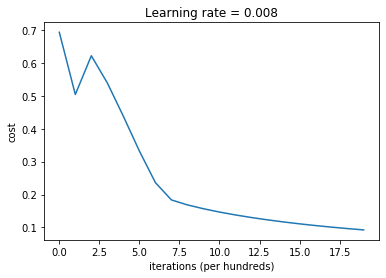

In [53]:
# Learning curve in graph
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.show()

learning rate is 0.01
train accuracy: 99.52153110047847%
test accuracy: 68.0%

learning rate is 0.001
train accuracy: 88.99521531100478%
test accuracy: 64.0%

learning rate is 0.0001
train accuracy: 68.42105263157895%
test accuracy: 36.0%



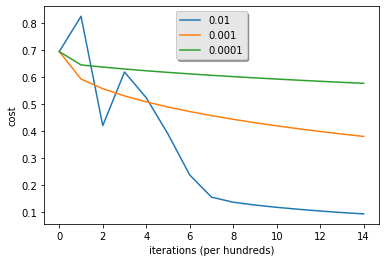

In [59]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for i in learning_rates:
    print("learning rate is " + str(i))
    models[str(i)] = model(train_x, train_y, test_x, test_y, num_iteration=1500,
                          learning_rate=i, print_cost=False)
    print()
    
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label=str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.3')
plt.show()